#### Consider Outliers
Many time series start off with some form of irregularity which could throw us off
#### Consider Normalising
We are *probably* not interested in heart rate, or voltage levels overall.
So these can be normalised to make them easier to work on
#### Classes are humanly understandable
There are 4 classes:
 - (0) healthy
 - (1) arythmia1 (qualitatively?)
 - (2) arythmia2 (qualitatively?)
 - (3) unreadable

#### Start with very simple features
- Look at K timestamp intervals 
- Try averaging between heartbeat windows 

#### Class imbalance
 Training set counts for the 4 classes are respectively [3030 443 1474 170]

In [91]:
import csv
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [1]:
# returns a dict mapping sample id [int] to the raw time series [np.array]
def importTimeSeries(filename):
    datafile = open(filename, 'r')
    datareader = csv.reader(datafile)
    out = dict()
    first = True
    for row in datareader:
        if first:
            first = False
            continue
        out[int(row[0])] = np.asarray(row[1:], dtype=float)
    return out

X_train = importTimeSeries('X_train.csv')
X_test  = importTimeSeries('X_test.csv')
train = pd.read_csv('y_train.csv').set_index('id')
test  = pd.read_csv('sample.csv').set_index('id')
train['X'] = [X_train[k] for k in train.index.values]
test['X']  = [X_test[k]  for k in test.index.values]
n_train = len(train)
n_test  = len(test)
print(n_train)
print(n_test)

5117
3411


In [2]:
from biosppy.signals import ecg
test['ecg']  = [ecg.ecg(signal=x, sampling_rate=300., show=False) for x in test.X]
train['ecg'] = [ecg.ecg(signal=x, sampling_rate=300., show=False) for x in train.X]

In [12]:
train_bk = train
test_bk = test

In [19]:
train = train_bk
test = test_bk

In [20]:
train.ecg[0].keys()

['ts',
 'filtered',
 'rpeaks',
 'templates_ts',
 'templates',
 'heart_rate_ts',
 'heart_rate']

In [73]:
np.shape(np.mean(train.ecg[2]['templates'], axis=0))

(180,)

In [94]:
train['intervs']  = [np.diff(e['rpeaks'][20:-10]) for e in train.ecg]
train['mean_interv']  = [np.mean(intervs) for intervs in train.intervs]
train['var_interv']  = [np.var(intervs) for intervs in train.intervs]
train['med_interv']  = [np.median(intervs) for intervs in train.intervs]
train['avg_tempt']  = [np.mean(e['templates'], axis=0) for e in train.ecg]
train['var_tempt']  = [np.var(e['templates'], axis=0) for e in train.ecg]

In [95]:
train0 = train[train.y==0]
train1 = train[train.y==1]
train2 = train[train.y==2]
train3 = train[train.y==3]
n0 = len(train0)
n1 = len(train1)
n2 = len(train2)
n3 = len(train3)
print('n[0,1,2,3] = ',n0,n1,n2,n3)

n[0,1,2,3] =  3030 443 1474 170


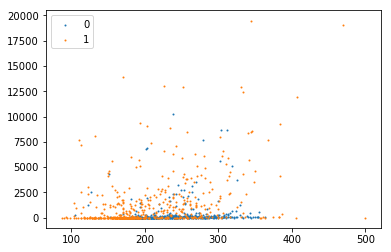

In [92]:
i=0
for subset in [train0, train2]:#, train2, train3]:
    plt.scatter(subset.med_interv, subset.var_interv, label=i, s=1)
    #plt.xlim([50,500])
    #plt.ylim([0,20000])
    i+=1
    plt.legend()
plt.show()

Class: 2


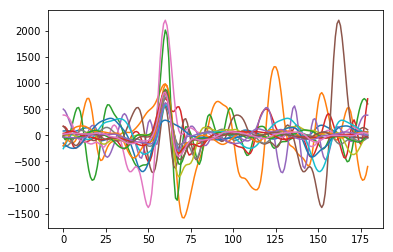

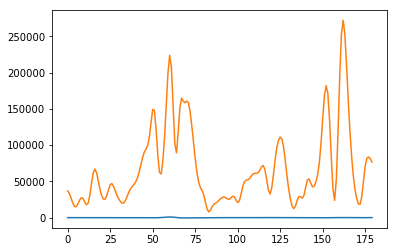

Class: 3


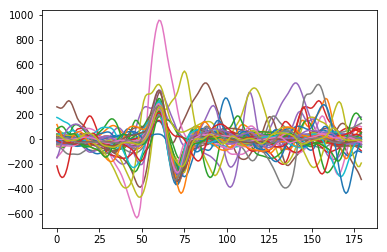

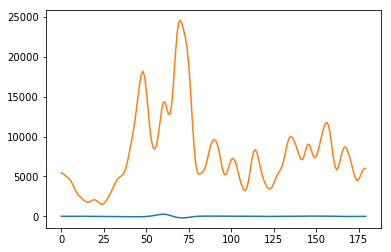

Class: 3


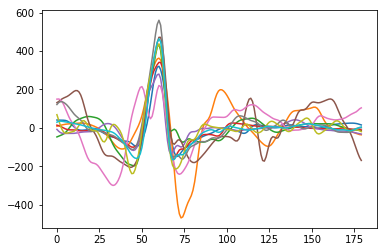

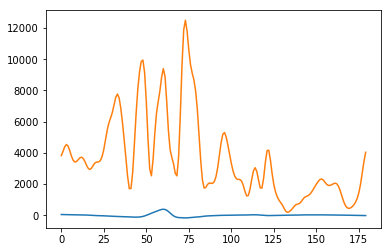

In [98]:
subset = train3
for k in subset.sample(3).index.values:
    print('Class:', sample.y)
    sample = subset.loc[k]
    for template in sample.ecg['templates']:
        plt.plot(template)
    plt.show()
    plt.plot(sample.avg_tempt)
    plt.plot(sample.var_tempt)

    plt.show()

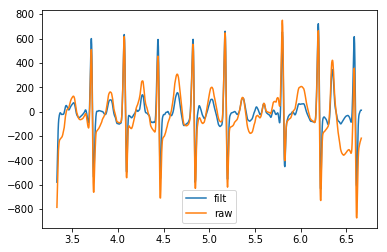

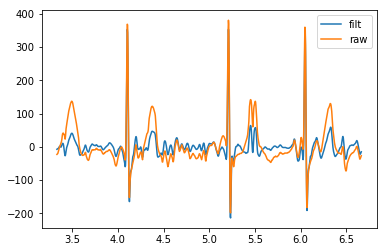

In [93]:
subset = train1
for k in subset.head(2).index.values:
    sample = subset.loc[k]
    plt.plot(sample.ecg['ts'][1000:2000],sample.ecg['filtered'][1000:2000], label='filt')
    plt.plot(sample.ecg['ts'][1000:2000],sample.X[1000:2000], label='raw')
    plt.legend()
    plt.show()